# __ML in der Logistik__
# Exercise 02 - Linear regression

__Goal__: Understand the algorithm, attribute selection, linear regression tree, the effect of the outliers on the model, build a simple linear regression model in Python and normalize a dataset.


__Data and application (Part 2)__: The dataset used contains the static informations of 4503 trips recorded on 4 routes in North Europa (Rotterdam > Hamburg, Kiel > Gdynia, Bremerhaven > Hamburg, Felixstowe > Rotterdam). We want to build a ML model to predict the length of a ship based on the other static characteristics.



### Contents

* [1 Theory: understand the linear regression algorithm](#t1)
    * [1.1 The algorithm (10 min)](#t11)
    * [1.2 Visual estimation (5 min)](#t12)
    * [1.3 Attribute selection (5 min)](#t13)
    * [1.4 Linear regression tree (15 min)](#t14)
* [2 Simple linear regression: predict the length of a ship](#t2)
    * [2.1 Load and prepare the data (5 min)](#t21)
    * [2.2 Split into training and testing sets (5 min)](#t22)
    * [2.3 Apply the LinearRegression algorithm (5 min)](#t23)
    * [2.4 Optimize the model (10 min)](#t24)

## 1 Theory: understand the linear regression algorithm <a class="anchor" id="t1"></a>

### 1.1 The algorithm (10 min) <a class="anchor" id="t11"></a>

*What is the formula of a linear regression model with n attributes?*

$$ \hat y = w^Tx + b $$

*What is the goal of the cost function?*

$$ J(w, b) = \frac{1}{2m} \Sigma_{i=1}^{m} (\hat{y_i} - y_i)^2 $$

Goal :    $ min\underset{w, b} J(w, b) $

*Explain the gradient descent algorithm for a problem with 2 attributes.*

- set up the linear regression model
- cost function
- gradient descent algorithm: choose random initial weights, update weights until convergence with some learning rate alpha
- compute the partial derivatives
- repeat until J stops decreasing drastically

### 1.2 Visual estimation (5 min) <a class="anchor" id="t12"></a>

![text](02-breadth_length.PNG)

This plot is the visual representation of the two attributes Length and Breadth of the dataset containing the metadata for 4503 trips on the 4 routes.

*From this plot, visually estimate the parameters of a linear model to predict the Length from the Breadth,
expressed like this: $y_i = \beta_0 + \beta_1 \cdot x_i$, with $y_i$ the value of the Length and $x_i$ the value of the Breadth for the instance $i$. Pick the right answer from the following list, and explain your choice:*

* 1. *$\beta_0 = 16,5$ ; $\beta_1 = -7,6$*
* 2. *$\beta_0 = -16,5$ ; $\beta_1 = 7,6$*
* 3. *$\beta_0 = -150,1$ ; $\beta_1 = 1,4$*
* 4. *$\beta_0 = 150,1$ ; $\beta_1 = -1,4$*

__Write the value of your choice in the following cell for the variable__ ``t12_parameters`` __(integer) (2 points).__

In [1]:
# Values of the parameters (integer)

t12_parameters = 2

#Explanation: One thing we can say easily is slope should be positive, and based on the visualization we can see for small x they is a bit larger y so its bigger slope and smaller negative intercept or even by just trying out 2 and 3 options on a point (60, 423) we can nearly predict 2 is the choice of parameters

### 1.3 Attribute selection (5 min) <a class="anchor" id="t13"></a>

According to the Ockam's razor principle, the selection of some attributes can be useful to reduce overfitting.

In machine learning, it is common to use some attribute selection methods, to select only the relevant attributes for the model and ignore the other ones.

In this exercise, we propose to study the effect of two algorithms for an automatised attribute selection: the M5 method and the greedy method.

* M5 method for attribute selection: step through the attributes, removing the one with the smallest standardised coefficient until no improvement is observed in the estimate of the error.
* Greedy algorithm for attribute selection: evaluates a subset of features, modifies it and evaluates if the new subset is an improvement over the old. Usually stops when the new subset is not an improvement.


This graph shows the MAE of the prediction of the Estimated Travel Time of each AIS signal, for 10 trips on the route Rotterdam > Hamburg. It represents the performance of an algorithm of linear regression, after applying the attribute selection algorithm. On the x-axis, the parameter is the attributes present in the dataset before applying the attribute selection algorithm and the linear model.

Note: these results were generated with the tool Weka.

![text](02-ex2-comparison-algorithms.PNG)

For each point on the graph, the attributes considered for the prediction are written on the x-axe and include:
* Position = Latitude, Longitude
* Speed = SOG, COG, TH
* Ship = Name, Callsign
* Shiptype = shiptype, MMSI
* ShipCharacteristics = Length, Breadth, Draught
* Time = timestamp

*What is the best set of attributes for predicting the ETT?*

: Position, Speed

*Look at the first step, where all the attributes are considered for the model. What MAE would you expect from an ideal attribute selection algorithm?*

: ideally we will choose the one with minimum MAE for ideal attribute selection algorithm, so at first step MAE can be expected to be equal to the same minimum MAE which is approx. 70 to 80 minutes.

*What conclusion about attribute selection do you get from this graph?*

: Attribute selection matters, removing irrelevant attributes increases generalization (Ockam's razor principle) and too few attributes (like last one with only position) also increases loss.

__Write the number of the best set of attributes for the prediction of the ETT in the following cell (integer) (2 points).__

+ 1: Position, Speed, Ship, Shiptype, ShipCharacteristics, Time
+ 2: Position, Speed, Ship, Shiptype, ShipCharacteristics
+ 3: Position, Speed, Ship, Shiptype
+ 4: Position, Speed, Ship
+ 5: Position, Speed
+ 6: Position

In [2]:
# Best set of attributes (integer)

t13_set_attributes = 5

__Write the value of the MAE that is expected from an ideal attribute selection algorithm, in minutes (numeric, we check a range of values so you don't need to get the exact value) (2 points).__

In [3]:
# MAE of ideal algorithm (integer, in minutes)

t13_MAE = 75

### 1.4 Linear regression  (15 min) <a class="anchor" id="t14"></a>

Supose we have a data set that contains only one input feature, average speed over ground of a trip and we want to predict the duration of a trip. 

Here is a plot of  the dataset.


![text](02-Linear_kiel.jpg)

_Which are the points participating the most in the error? What can we do to get rid of the high error?_

: 
- between SOG 14-16 there are few points which are outliers and effecting the prediction where most of the other points follow the same trend of decreasing the time taken based on increase of SOG.
- deal with the outliers using various methods or even manual thresholding like above 2000 or 2250, use more robust model or transform the variable and linearize the relation

_What can we do to get a model that better fits our data? Is a simple linear model a good approximation?_

:
- based on domain knowledge as duration is inversely proportional to the speed over ground we can say a simple linear model might be a good approximation.
- we can also use some polynomial regression or non linear regression models etc and try to better fit out data.




## 2 Linear regression: predict the duration of a trip <a class="anchor" id="t2"></a>

### 2.1 Load the data (5 min)  <a class="anchor" id="t21"></a>

In this exercise, we will use the dataset ``02-linear-regression_1.csv``. Read the file and examine the dataset.

In [4]:
# Import the data
import pandas as pd

df = pd.read_csv('02-linear-regression_1.csv')

### 2.2 Split into training and testing sets (5 min) <a class="anchor" id="t22"></a>

For splitting the dataset into train and test sets, we need to define the value of ``x``, the list containing the predictive attributes, and ``y``, the predicted attribute. 

__Set up the lists x and y (2 points).__

In [17]:
# Set up x and y

x = ['SOG']
y = ['Duration']

This dataset is simple. We can use the function ``train_test_split`` from the ``sklearn`` library to split the dataset into a train and test sets.

This function takes as arguments the predictive data, the predicted attribute, the size of the test dataset (here 0.2, being 20% of the dataset) and the random seed (here, 1).

In [18]:
# Split train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[x], df[y], test_size = 0.2, random_state = 1)

### 2.3 Apply the LinearRegression algorithm (5 min)  <a class="anchor" id="t23"></a>

We will apply the algorithm ``LinearRegression`` from the ``sklearn`` library.

__Write the code to apply the algorithm (as we saw in the first exercise sheet), predicting the attribute 'Length' using all the other attributes. Do not specify any parameters for the algorithm. Compute the mean absolute error for the performance.__

In [19]:
# Apply the LinearRegression algorithm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

reg = LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(mae)

133.67258847212693


Besides getting predictions from the model built, the ``LinearRegression`` algorithm provides us with informations about the built model. After training the model with the function ``fit()``, we can access the coefficients of the model in the attribute ``coef_[0]``. We can also get the interception of the model with the attribute ``intercept_[0]``.

Here is a short script to print the values of the coefficients of the model. Run this script to take a look at the model built.

In [20]:
# Print the coefficients of the model. Works also form more input features.

print('Linear regression model:')
i = 0
for coef in reg.coef_[0]: # loop on the coefficients
    print(str(round(coef, 4)) + '\t\t * ' + str(x[i]) + ' +') # print each coefficient with the name of the attribute
    i = i + 1
print(str(round(reg.intercept_[0], 4))) # print the intercept

Linear regression model:
-126.8522		 * SOG +
3396.6997


### 2.4 Optimize the model (10 min) <a class="anchor" id="t24"></a>

We have a very simple data set. Just one input feature. To vizualize our problems, we can plot our model and the data. I have done it for you. Look at the picture below and you see that are a few data points that seem to be unusual, outliers.
We should eliminate them.

![text](02_Linear_Kiel_outliers.jpg)

We can see that the points where SOG is bigger than 14 and the Duration is bigger than 2200 are the outliers.
We can use a filter condition to eliminate those data. We can use a data frame filter to select only those that are relevant.
If we want to keep all examples where the SOG is bigger than 14 we can write dfNew = df[(df["SOG"] >=14)]. You should now select those examples that are not outliers. Boolean operators are not(~), and(&) and or(|).

In [ ]:
# filter the dataframe
dfNew = df[~((df['SOG'] >= 14) & (df['Duration'] >= 2200))]

(394, 2) (379, 2)


Build a new linear regressor. Compare the error with and without the outliers.

In [23]:
xNew = ['SOG']
yNew = ['Duration']

from sklearn.model_selection import train_test_split
XNew_train, XNew_test, yNew_train, yNew_test = train_test_split(dfNew[xNew], dfNew[yNew], test_size = 0.2, random_state = 1)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

reg = LinearRegression()
reg.fit(XNew_train, yNew_train)
predictions = reg.predict(XNew_test)
mae = mean_absolute_error(yNew_test, predictions)
print(mae)

61.36057843040143


With the following function you can plot the data and the model.

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data_and_model(coefficients, x_data, y_data):
    poly_fit = np.poly1d(coefficients)
    # print(poly_fit)
    xx = np.linspace(0, 20, 40)
    p=poly_fit(xx)
    plt.plot(xx, p, c='r',linestyle='-')
    plt.title('Linear')
    plt.xlabel('SOG')
    plt.ylabel('Duration')
    plt.axis([6, 20, 1000, 2900])
    plt.grid(False)
    plt.scatter(x_data, y_data)
    plt.show()

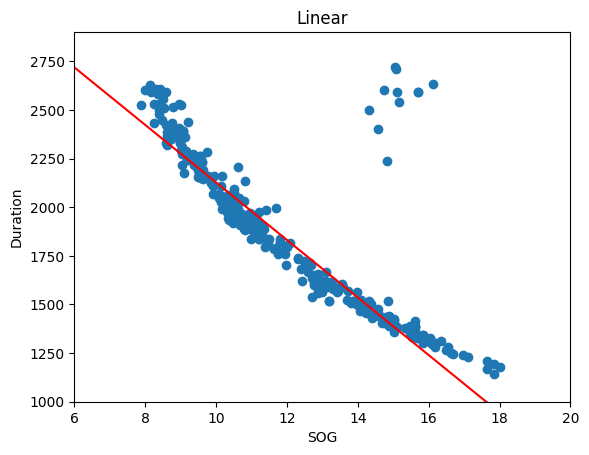

In [27]:
# plot the data and model
#
coefficients=np.array([reg.coef_[0],reg.intercept_[0]],dtype=object)

plot_data_and_model(coefficients, X_train,y_train)

The mean absolute error dropped down after eliminating the outliers. If you look at the model, you can see that the simple linear regressor is not optimal. From 8 to 9 and 16 to 18 the error is high. We can also use a ploynomial regressor.
There are several ways to implement the polynomial regressor.
You can use ``PolynomialFeatures`` to transform the input data into a polynomial feature set. You have to pass the variable ``degree=X`` to create the PolynomialFeatures object. Afterwards you can create the new feature set with the function ``fit_transform``. You have to pass the original feature set to this function. Check how the new feature set looks like.

Now we can again use ``plot_data_and_model`` to plot the result. You should also check the mean absolute error and compare it with the previous built regressors.

Try out different degrees to find the best solution. Beside plotting use the mean absolute error to compare the results on the training and test data.

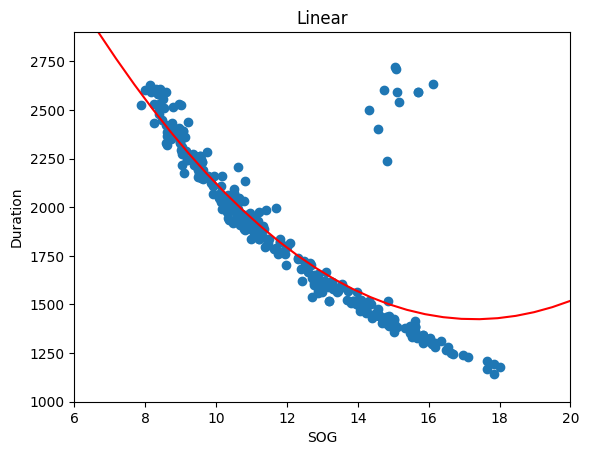

101.43766189716798

In [44]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_3 = poly.fit_transform(X_train)
reg=LinearRegression(fit_intercept=False)
reg.fit(x_3,y_train)
coef = np.flip(reg.coef_.flatten())
plot_data_and_model(coef, X_train,y_train)
predictions = reg.predict(x_3)
mean_absolute_error(predictions, y_train)